In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
main_power_sensor_data = pd.read_csv('all_data/all_final_df/class_a_main_power_sensor.csv')
main_power_usage_sensor_data = pd.read_csv('all_data/all_final_df/class_a_main_power_usage_sensor.csv')
device_power_sensor_data = pd.read_csv('all_data/all_final_df/class_a_device_power_sensor.csv')
device_power_usage_sensor_data = pd.read_csv('all_data/all_final_df/class_a_device_power_usage_sensor.csv')
environmental_sensor_data = pd.read_csv('all_data/all_final_df/class_a_environmental_sensor.csv')

In [3]:
main_power_sensor_data['time'] = pd.to_datetime(main_power_sensor_data['time'])
main_power_usage_sensor_data['time'] = pd.to_datetime(main_power_usage_sensor_data['time'])
device_power_sensor_data['time'] = pd.to_datetime(device_power_sensor_data['time'])
device_power_usage_sensor_data['time'] = pd.to_datetime(device_power_usage_sensor_data['time'])
environmental_sensor_data['time'] = pd.to_datetime(environmental_sensor_data['time'])

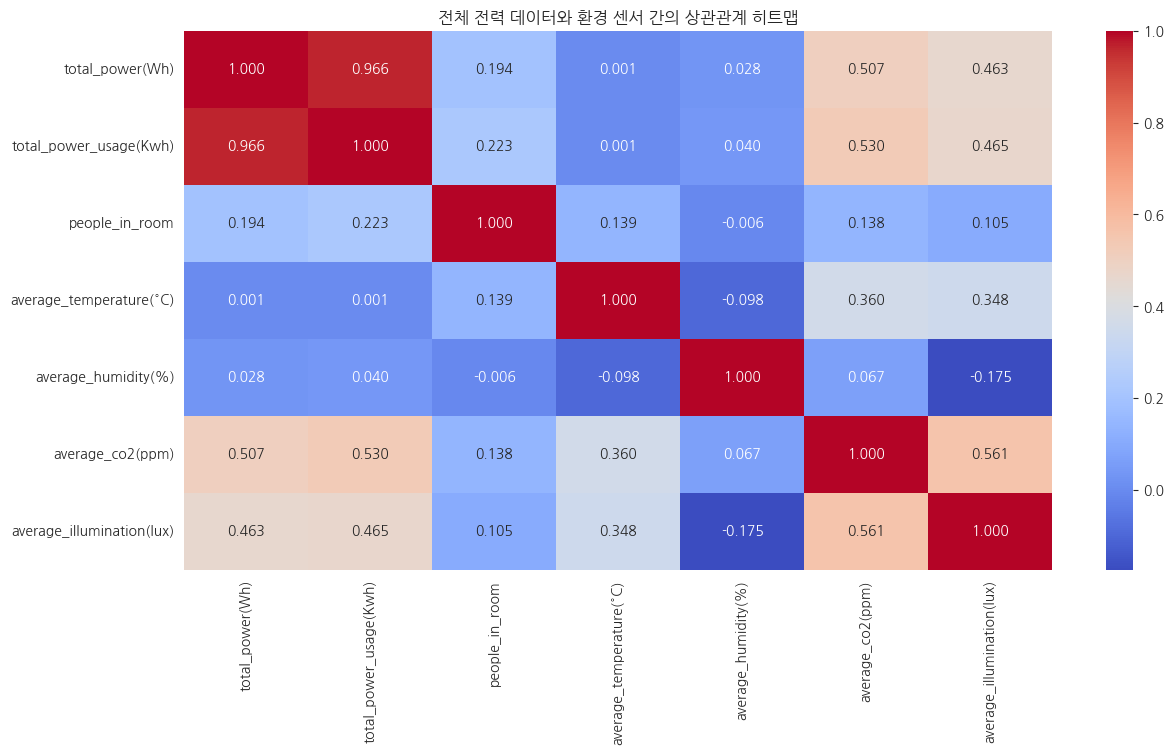

In [4]:
merged_data = pd.merge(main_power_sensor_data, main_power_usage_sensor_data, on='time', how='inner')
merged_data = pd.merge(merged_data, environmental_sensor_data, on='time', how='inner')

correlation_matrix = merged_data.corr()

plt.figure(figsize=(14, 7))
heatmap1 = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('전체 전력 데이터와 환경 센서 간의 상관관계 히트맵')
plt.show()

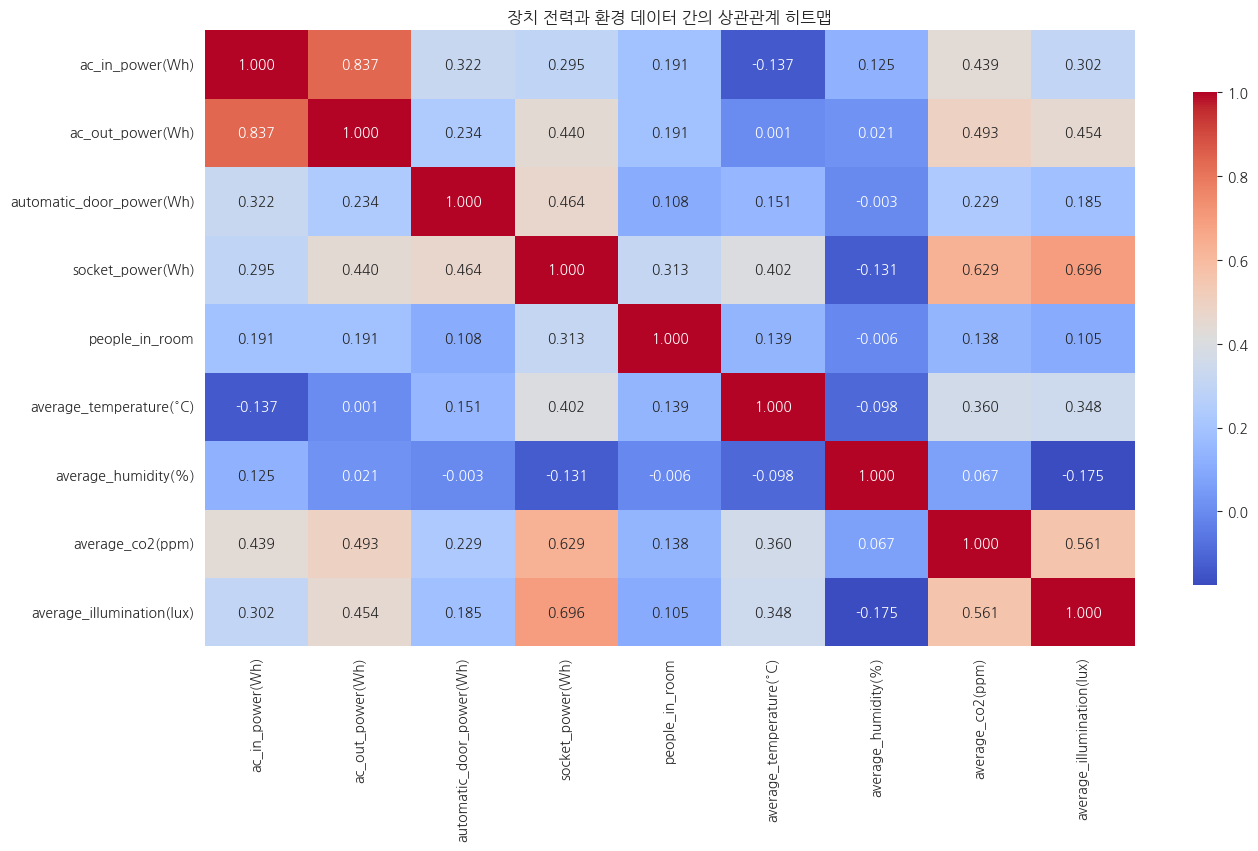

In [5]:
# 데이터 병합
merged_data = pd.merge(device_power_sensor_data, environmental_sensor_data, on='time', how='inner')

# 상관관계 계산
correlation_matrix = merged_data.corr()

# 히트맵 생성
plt.figure(figsize=(15, 8))
heatmap2 = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={"shrink": .8})
plt.title('장치 전력과 환경 데이터 간의 상관관계 히트맵')
plt.show()

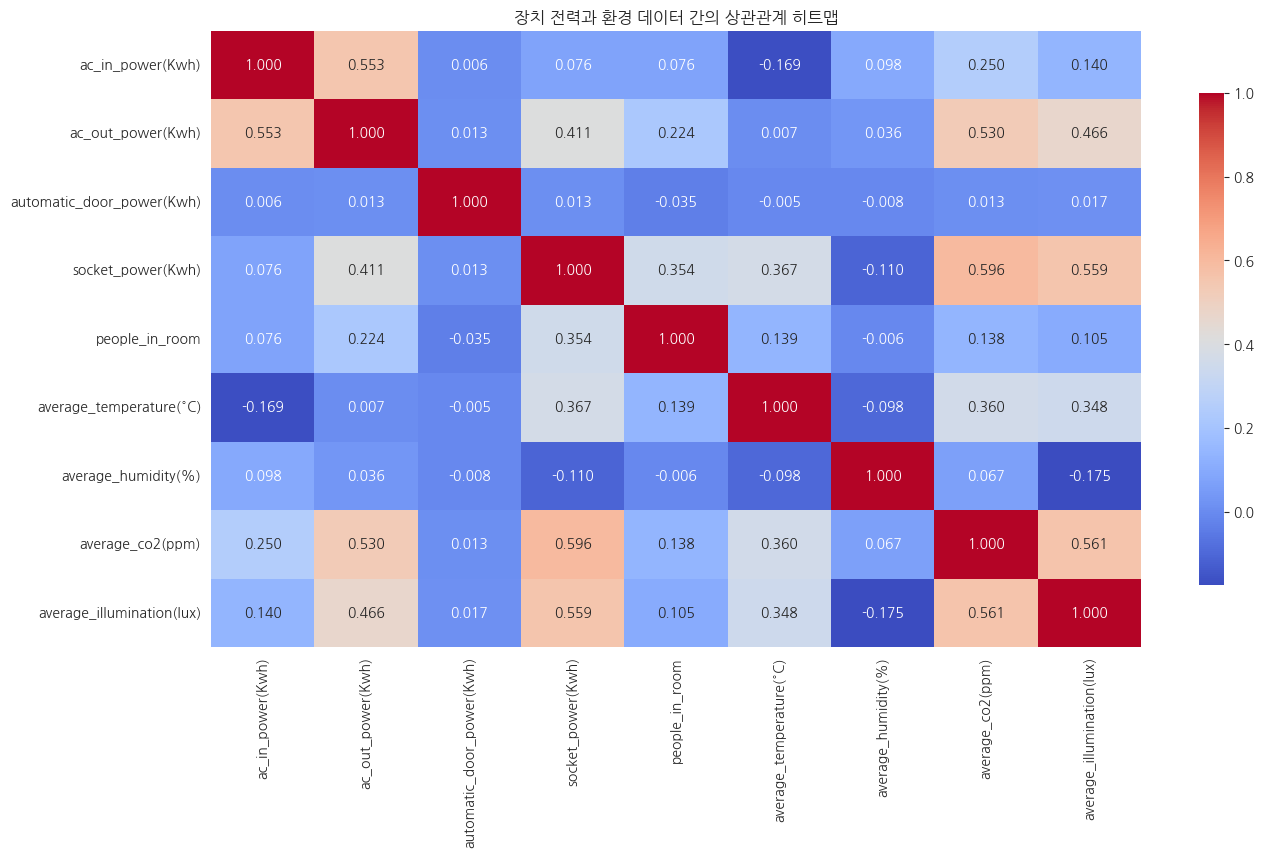

In [6]:
# 데이터 병합
merged_data = pd.merge(device_power_usage_sensor_data, environmental_sensor_data, on='time', how='inner')

# 상관관계 계산
correlation_matrix = merged_data.corr()

# 히트맵 생성
plt.figure(figsize=(15, 8))
heatmap3 = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={"shrink": .8})
plt.title('장치 전력과 환경 데이터 간의 상관관계 히트맵')
plt.show()

낮은 계수 증명

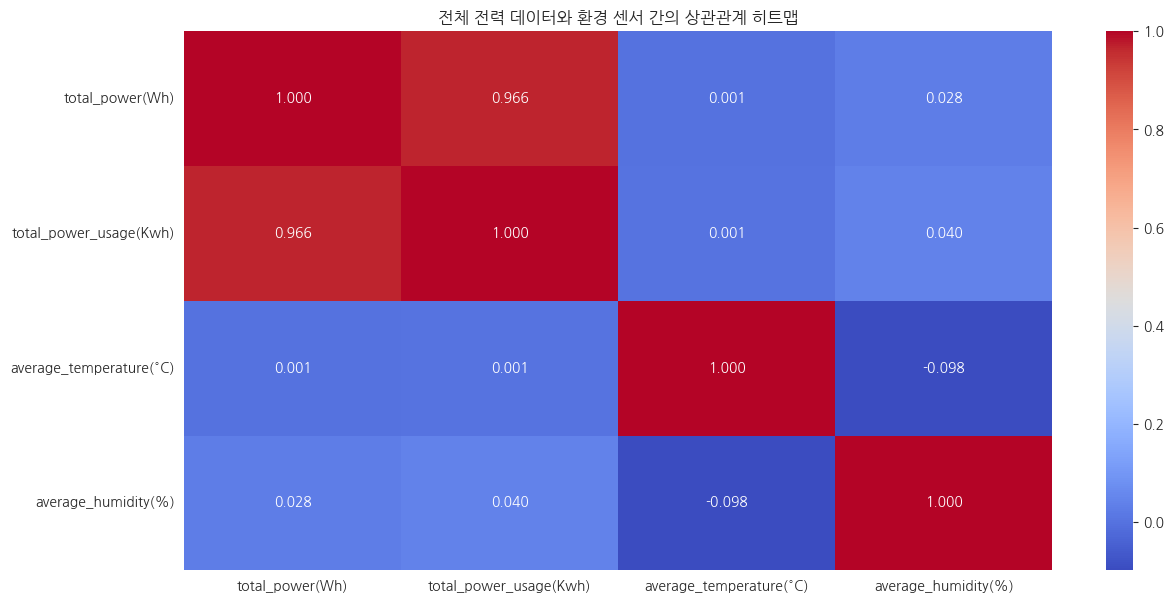

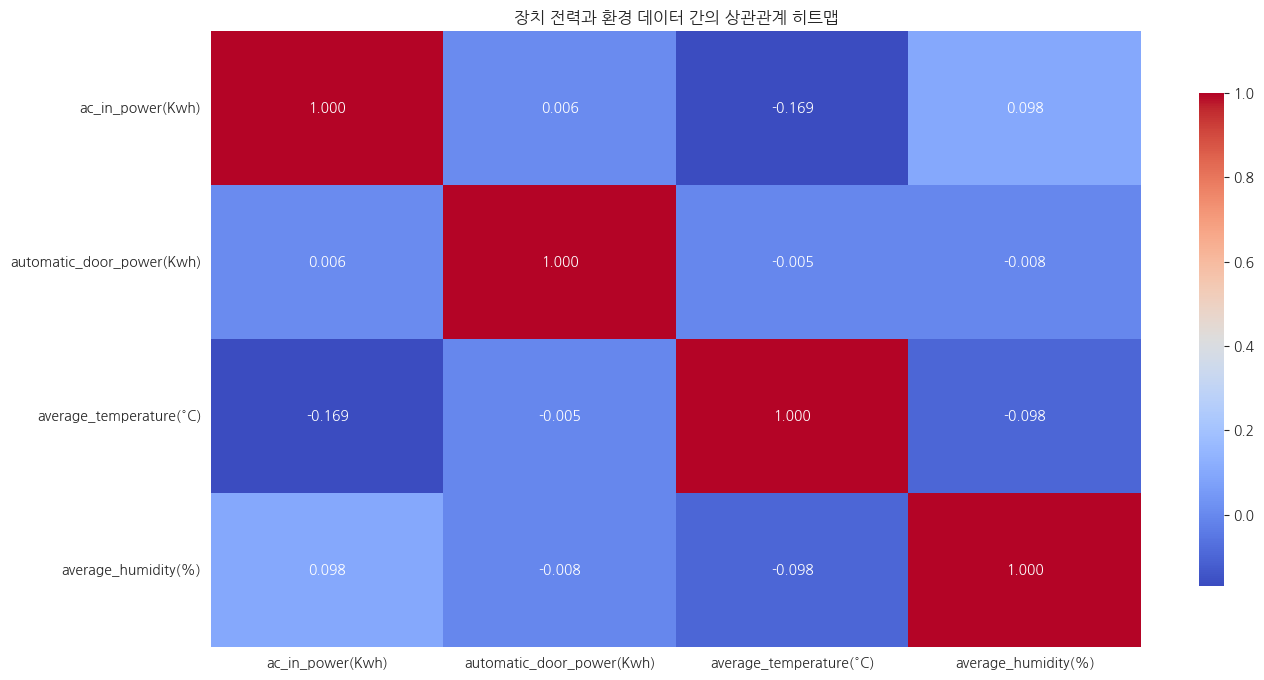

In [7]:
merged_data = pd.merge(main_power_sensor_data, main_power_usage_sensor_data, on='time', how='inner')
merged_data = pd.merge(merged_data, environmental_sensor_data[['time', 'average_temperature(°C)', 'average_humidity(%)']], on='time', how='inner')

correlation_matrix = merged_data.corr()

plt.figure(figsize=(14, 7))
heatmap4 = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('전체 전력 데이터와 환경 센서 간의 상관관계 히트맵')
plt.show()

merged_data = pd.merge(device_power_usage_sensor_data[['time', 'ac_in_power(Kwh)', 'automatic_door_power(Kwh)']], environmental_sensor_data[['time', 'average_temperature(°C)', 'average_humidity(%)']], on='time', how='inner')

correlation_matrix = merged_data.corr()

plt.figure(figsize=(15, 8))
heatmap5 = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", cbar_kws={"shrink": .8})
plt.title('장치 전력과 환경 데이터 간의 상관관계 히트맵')
plt.show()

위 데이터 plot에서 온도, 습도, 이동감지 센서와 전력의 관계 계수를 보았을때 

연관이 없다 판단하여 분석 데이터에서 제외한다.